In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import statsmodels.formula.api as smf

In [62]:
# df = pd.read_csv('s3://olistdashdb/csv/olist_customers_dataset.csv')

GETTING THE DATA

In [63]:
from olistdash.data import Olist
data = Olist().get_data()

In [64]:
from olistdash.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

In [82]:
from olistdash.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

In [83]:
orders

order_id  wait_time  expected_wait_time  \
0      e481f51cbdc54678b7cc49136f2d6af7   8.436574           15.544063   
1      53cdb2fc8bc7dce0b6741e2150273451  13.782037           19.137766   
2      47770eb9100c2d0c44946d9cf07ec65d   9.394213           26.639711   
3      949d5b44dbf5de918fe9c16f97b45f8a  13.208750           26.188819   
4      ad21c59c0840e6cb83a9ceb5573f8159   2.873877           12.112049   
...                                 ...        ...                 ...   
96528  9c5dedf39a927c1b2549525ed64a053c   8.218009           18.587442   
96529  63943bddc261676b46f01ca7ac2f7bd8  22.193727           23.459051   
96530  83c1379a015df1e13d02aae0204711ab  24.859421           30.384225   
96531  11c177c8e97725db2631073c19f07b62  17.086424           37.105243   
96532  66dea50a8b16d9b4dee7af250b4be1a5   7.674306           25.126736   

       delay_vs_expected order_status  dim_is_five_star  dim_is_one_star  \
0                    0.0    delivered                 0                0   
1                    0.0    delivered                 0                0   
2                    0.0    delivered                 1                0   
3                    0.0    delivered                 1                0   
4                    0.0    delivered                 1                0   
...                  ...          ...               ...              ...   
96528                0.0    delivered                 1                0   
96529                0.0    delivered                 0                0   
96530                0.0    delivered                 1                0   
96531                0.0    delivered                 0                0   
96532                0.0    delivered                 1                0   

       review_score  number_of_products  number_of_sellers   price  \
0                 4                   1                  1   29.99   
1                 4                   1                  1  118.70   
2                 5                   1                  1  159.90   
3                 5                   1                  1   45.00   
4                 5                   1                  1   19.90   
...             ...                 ...                ...     ...   
96528             5                   1                  1   72.00   
96529             4                   1                  1  174.90   
96530             5                   1                  1  205.99   
96531             2                   2                  1  359.98   
96532             5                   1                  1   68.50   

       freight_value  distance_seller_customer  
0               8.72                 18.063837  
1              22.76                856.292580  
2              19.22                514.130333  
3              27.20               1822.800366  
4               8.72                 30.174037  
...              ...                       ...  
96528          13.08                 69.481037  
96529          20.10                474.098245  
96530          65.02                968.051192  
96531          81.18                370.146853  
96532          18.36                631.817784  

[96525 rows x 13 columns]

In [85]:
from olistdash.data import Olist
data = Olist().get_data()
df = data['order_payments'][['order_id','payment_value']].merge(data['orders'][['order_id','order_purchase_timestamp']], on='order_id', how='outer')
df

order_id  payment_value  \
0       b81ef226f3fe1789b1e8b2acac839d17          99.33   
1       a9810da82917af2d9aefd1278f1dcfa0          24.39   
2       25e8ea4e93396b6fa0d3dd708e76c1bd          65.71   
3       ba78997921bbcdc1373bb41e913ab953         107.78   
4       42fdf880ba16b47b59251dd489d4441a         128.45   
...                                  ...            ...   
103882  7b905861d7c825891d6347454ea7863f          96.80   
103883  32609bbb3dd69b3c066a6860554a77bf          47.77   
103884  b8b61059626efa996a60be9bb9320e10         369.54   
103885  28bbae6599b09d39ca406b747b6632b1         191.58   
103886  bfbd0f9bdef84302105ad712db648a6c            NaN   

       order_purchase_timestamp  
0           2018-04-25 22:01:49  
1           2018-06-26 11:01:38  
2           2017-12-12 11:19:55  
3           2017-12-06 12:04:06  
4           2018-05-21 13:59:17  
...                         ...  
103882      2017-08-18 09:45:35  
103883      2017-11-18 17:27:14  
103884      2018-08-07 23:26:13  
103885      2017-12-05 08:18:35  
103886      2016-09-15 12:16:38  

[103887 rows x 3 columns]

In [86]:
reviews = data['order_reviews']
reviews

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99995  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99996  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99997  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99998  be360f18f5df1e0541061c87021e6d93  f8bd3f2000c28c5342fedeb5e50f2e75   
99999  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99995             5                  NaN   
99996             5                  NaN   
99997             4                  NaN   
99998             1                  NaN   
99999             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99995                                                NaN  2017-12-09 00:00:00   
99996  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99997                                                NaN  2018-07-01 00:00:00   
99998  Solicitei a compra de uma capa de retrovisor c...  2017-12-15 00:00:00   
99999  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99995     2017-12-11 20:06:42  
99996     2018-03-23 09:10:43  
99997     2018-07-02 12:59:13  
99998     2017-12-16 01:29:43  
99999     2017-07-03 21:01:49  

[100000 rows x 7 columns]

In [65]:
features = [
    "wait_time",
    "delay_vs_expected",
    "number_of_products",
    "number_of_sellers",
    "price",
    "freight_value",
    "distance_seller_customer",
]
orders_standardized = orders.copy()
for f in features:
    mu = orders[f].mean()
    sigma = orders[f].std()
    orders_standardized[f] = orders[f].map(lambda x: (x - mu) / sigma)
formula = "review_score ~ " + ' + '.join(features)
model4 = smf.ols(formula=formula, data=orders_standardized).fit()

In [66]:
predicted_review_score = model4.predict(orders_standardized[features])
residuals = predicted_review_score - orders_standardized.review_score

In [67]:
RMSE = (residuals.map(lambda x: x**2).sum() / len(residuals))**0.5

In [68]:
pd.DataFrame(residuals)

0
0      0.295784
1      0.184043
2     -0.667432
3     -0.625966
4     -0.439598
...         ...
96528 -0.685274
96529 -0.277952
96530 -1.312224
96531  1.710528
96532 -0.565040

[96525 rows x 1 columns]

In [69]:
residuals

0        0.295784
1        0.184043
2       -0.667432
3       -0.625966
4       -0.439598
           ...   
96528   -0.685274
96529   -0.277952
96530   -1.312224
96531    1.710528
96532   -0.565040
Length: 96525, dtype: float64

In [73]:
# pd.DataFrame(residuals).reset_index()[0]

In [74]:
# fig = px.histogram(
#     x=pd.DataFrame(residuals).reset_index()[0],
#     y=pd.DataFrame(residuals).reset_index()['index'],
#     histnorm='probability density',
#     histfunc='count'

# )
# fig.show()

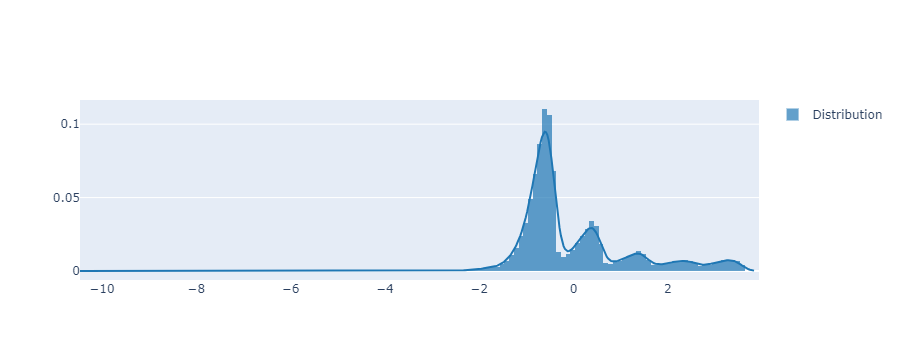

In [76]:
import plotly.figure_factory as ff
group_labels=['Distribution']
fig = ff.create_distplot([residuals], group_labels, bin_size=.1, show_rug=False, histnorm='probability',)
fig.show()

In [46]:
orders_standardized.review_score

0        4
1        4
2        5
3        5
4        5
        ..
96528    5
96529    4
96530    5
96531    2
96532    5
Name: review_score, Length: 96525, dtype: int64

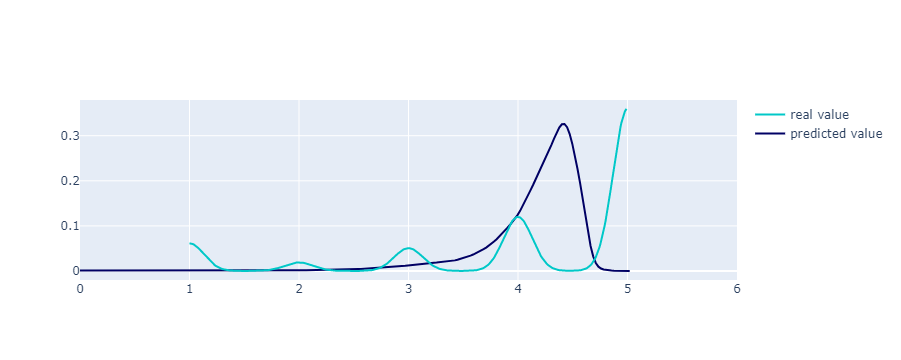

In [81]:
x1=predicted_review_score
x2=orders.review_score

group_labels=['predicted value','real value']
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']
# Create distplot with custom bin_size
fig = ff.create_distplot(
    [x1, x2],
    group_labels,
    show_hist=False,
    bin_size=.2,
    show_rug=False,
    colors=colors,
    histnorm='probability',
    
    
)
fig.update_layout(
    xaxis={
    # "autorange": True,
        "range": [
            "0",
            "6",
        ],
    }
    )
fig.show()

In [32]:
residuals.mean()

-1.1213214592371359e-14

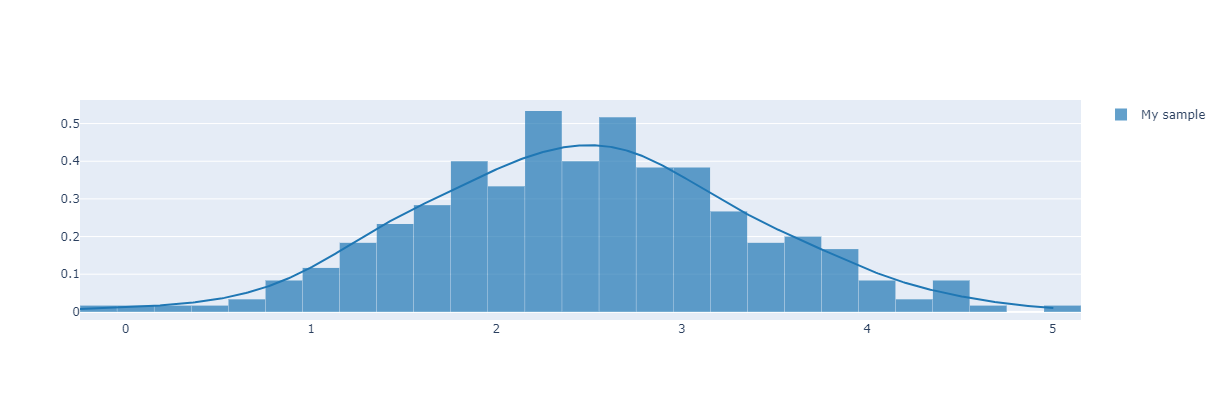

In [12]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(123)
x = np.random.normal(loc=2.5, scale=0.85, size=300) 
group_labels = 'My sample'

# Create distplot with custom bin_size, and without rug plot
fig = ff.create_distplot([x], [group_labels], bin_size=.2, show_rug=False)
fig.update_layout(width=600, 
                  height=400,
                  bargap=0.01)